# Project 4 - Identifiez les causes d'attrition au sein d'une ESN

# Etape 1 : Analyse exploratoire
**Objectif**: comprendre les données et identifier les variables clés

**Contenu:**
- Chargement des fichiers `extrait_sirh.csv` / `extrait_eval.csv`/ `extrait_sondage.csv`
- Aperçu général `df.head(), df.info(), df.describe()`
- Gestion des valeurs manquantes
- Visualisations (`seaborn, matplotlib`)
- Comparaisons : employés partis vs restés
- Premiers insights RH

### Source
- `extrait_sirh.csv` - les données de la systeme enterne SIRH de base (age, service, ancienneté, etc.)
- `extrait_eval.csv`-  les évaluations annuelles de performance
- `extrait_sondage.csv`- le sondage de satisfaction pour le bien-être des employés

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Effectuez une analyse exploratoire des fichiers de donées

In [199]:
# Chargement des fichiers
sirh = pd.read_csv("../data/extrait_sirh.csv")
evals = pd.read_csv("../data/extrait_eval.csv")
sondage = pd.read_csv("../data/extrait_sondage.csv")

### 1. Compréhension et nettoyage des donées
*Objectif* : identifier les types de colonnes (quantitatives / qualitatives)

In [200]:
for name, df in {"SIRH": sirh, "EVAL": evals, "SONDAGE": sondage}.items():
    print (f"{name}")
    print(df.info())
    print(df.head(3))
    print("Valeur manquantes par colonne:")
    print (df.isnull().sum())
    print("Statistiques descriptives: ")
    print(df.describe(include='all'))

    # Comptage des types de données
    type_counts = df.dtypes.value_counts()
    print("Types de données :")
    print(type_counts)
    
    # Classification simplifiée : quanti / quali
    quanti = df.select_dtypes(include=[np.number]).columns.tolist()
    quali = df.select_dtypes(exclude=[np.number]).columns.tolist()
    
    print(f"\nVariables quantitatives ({len(quanti)}): {quanti}")
    print(f"Variables qualitatives ({len(quali)}): {quali}")

SIRH
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+

In [201]:
# Suppression du signe % et conversion en nombre
evals["augementation_salaire_precedente"] = evals["augementation_salaire_precedente"].apply(lambda x: int(x.replace(" %", "")))

### 2. Creation un DataFrame central

In [202]:
#Normalisation la clé de jointure dans evals
evals["id_employee"] = evals["eval_number"].str.replace("E_", "").astype(int)

In [203]:
evals.columns
evals = evals.drop(columns=["eval_number"])
evals.head()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,id_employee
0,2,3,2,4,1,1,3,Oui,11,1
1,3,2,2,2,4,3,4,Non,23,2
2,4,2,1,3,2,3,3,Oui,15,4
3,4,3,1,3,3,3,3,Oui,11,5
4,1,3,1,2,4,3,3,Non,12,7


In [204]:
# Renomer la clé dans sondage pour cohérence
sondage.rename(columns={"code_sondage": "id_employee"}, inplace=True)

In [205]:
# Jointures (on garde tous les employés, même si certaines infos manquent)
df_merge = pd.merge(sirh, evals, on="id_employee", how="left")
df_merge.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,4,2,3,2,4,1,1,3,Oui,11
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,7,3,2,2,2,4,3,4,Non,23
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,0,4,2,1,3,2,3,3,Oui,15
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,7,4,3,1,3,3,3,3,Oui,11
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,2,1,3,1,2,4,3,3,Non,12


In [206]:
df_central = pd.merge(df_merge, sondage, on="id_employee", how="left")
df_central.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,0,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,1,3,1,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,0,3,1,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,0,3,1,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,1,3,1,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [207]:
df_central.describe()

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,...,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,augementation_salaire_precedente,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,80.0,11.279592,7.008163,4.229252,2.721769,2.729932,...,2.761224,3.153741,15.209524,0.793878,2.799320,1.0,9.192517,2.912925,2.187755,4.123129
std,602.024335,9.135373,4707.956783,2.498009,0.0,7.780782,6.126525,3.623137,1.093082,0.711561,...,0.706476,0.360824,3.659938,0.852077,1.289271,0.0,8.106864,1.024165,3.222430,3.568136
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,3.000000,11.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,80.0,6.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,12.000000,0.000000,2.000000,1.0,2.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,80.0,10.000000,5.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,14.000000,1.000000,3.000000,1.0,7.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,80.0,15.000000,9.000000,7.000000,4.000000,3.000000,...,3.000000,3.000000,18.000000,1.000000,3.000000,1.0,14.000000,4.000000,3.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,80.0,40.000000,40.000000,18.000000,4.000000,4.000000,...,4.000000,4.000000,25.000000,3.000000,6.000000,1.0,29.000000,5.000000,15.000000,17.000000


In [208]:
df_central.describe(include='object')

,genre,statut_marital,departement,poste,heure_supplementaires,a_quitte_l_entreprise,domaine_etude,ayant_enfants,frequence_deplacement
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,9,2,2,6,1,3
top,M,Marié(e),Consulting,Cadre Commercial,Non,Non,Infra & Cloud,Y,Occasionnel
freq,882,673,961,326,1054,1233,606,1470,1043


In [209]:
df_central.rename(columns={"a_quitte_l_entreprise": "attrition"}, inplace=True)

In [210]:
partis_df = df_central[df_central['attrition'] == "Oui"]
restes_df = df_central[df_central['attrition'] == "Non"]

In [211]:
print ("Nombre d'employeée total=", len(df_central))
print("Nombre d'employeée partis=", len(partis_df))
print("Nombre d'employeée restés=", len(restes_df))

Nombre d'employeée total= 1470
Nombre d'employeée partis= 237
Nombre d'employeée restés= 1233


In [212]:
partis_df.describe()

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,...,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,augementation_salaire_precedente,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000
mean,1010.345992,33.607595,4787.092827,2.940928,80.0,8.244726,5.130802,2.902954,2.464135,2.518987,...,2.658228,3.156118,15.097046,0.527426,2.624473,1.0,10.632911,2.839662,1.945148,2.852321
std,580.750572,9.689350,3640.210367,2.678519,0.0,7.169204,5.949984,3.174827,1.169791,0.773405,...,0.816453,0.363735,3.770294,0.856361,1.254784,0.0,8.452525,1.008244,3.153077,3.143349
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,3.000000,11.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
25%,514.000000,28.000000,2373.000000,1.000000,80.0,3.000000,1.000000,0.000000,1.000000,2.000000,...,2.000000,3.000000,12.000000,0.000000,2.000000,1.0,3.000000,2.000000,0.000000,0.000000
50%,1017.000000,32.000000,3202.000000,1.000000,80.0,7.000000,3.000000,2.000000,3.000000,3.000000,...,3.000000,3.000000,14.000000,0.000000,2.000000,1.0,9.000000,3.000000,1.000000,2.000000
75%,1486.000000,39.000000,5916.000000,5.000000,80.0,10.000000,7.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,17.000000,1.000000,3.000000,1.0,17.000000,4.000000,2.000000,5.000000
max,2055.000000,58.000000,19859.000000,9.000000,80.0,40.000000,40.000000,15.000000,4.000000,4.000000,...,4.000000,4.000000,25.000000,3.000000,6.000000,1.0,29.000000,5.000000,15.000000,14.000000


In [213]:
restes_df.describe()

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,...,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,augementation_salaire_precedente,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1233.000000,1233.000000,1233.000000,1233.00000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000
mean,1027.656123,37.561233,6832.739659,2.64558,80.0,11.862936,7.369019,4.484185,2.771290,2.770479,...,2.781022,3.153285,15.231144,0.845093,2.832928,1.0,8.915653,2.927007,2.234388,4.367397
std,606.217074,8.888360,4818.208001,2.46009,0.0,7.760719,6.096298,3.649402,1.071132,0.692050,...,0.681907,0.360408,3.639511,0.841985,1.293585,0.0,8.012633,1.027002,3.234762,3.594116
min,2.000000,18.000000,1051.000000,0.00000,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,3.000000,11.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
25%,483.000000,31.000000,3211.000000,1.00000,80.0,6.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,12.000000,0.000000,2.000000,1.0,2.000000,2.000000,0.000000,2.000000
50%,1022.000000,36.000000,5204.000000,2.00000,80.0,10.000000,6.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,14.000000,1.000000,3.000000,1.0,7.000000,3.000000,1.000000,3.000000
75%,1574.000000,43.000000,8834.000000,4.00000,80.0,16.000000,10.000000,7.000000,4.000000,3.000000,...,3.000000,3.000000,18.000000,1.000000,3.000000,1.0,13.000000,4.000000,3.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.00000,80.0,38.000000,37.000000,18.000000,4.000000,4.000000,...,4.000000,4.000000,25.000000,3.000000,6.000000,1.0,29.000000,5.000000,15.000000,17.000000


On va comparer les mean et std types entre les employée qui sont partis et ceux qui sont restes:

`age` L'âge des employés qui sont restés est plus élevé que celui des employés qui sont partis

`distance_domicile_travail` Les employés qui sont restés vivent plus près de chez eux. 

`satisfaction_employee_equilibre_pro_perso` Les employés qui sont restés sont généralement plus satisfaits de leur travail.

`nombre_participation_pee` Les employés restés dans l’entreprise participent davantage au PEE

### 3. Visualisation graphique des différences clés

array([[<Axes: title={'center': 'id_employee'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'revenu_mensuel'}>,
        <Axes: title={'center': 'nombre_experiences_precedentes'}>,
        <Axes: title={'center': 'nombre_heures_travailless'}>],
       [<Axes: title={'center': 'annee_experience_totale'}>,
        <Axes: title={'center': 'annees_dans_l_entreprise'}>,
        <Axes: title={'center': 'annees_dans_le_poste_actuel'}>,
        <Axes: title={'center': 'satisfaction_employee_environnement'}>,
        <Axes: title={'center': 'note_evaluation_precedente'}>],
       [<Axes: title={'center': 'niveau_hierarchique_poste'}>,
        <Axes: title={'center': 'satisfaction_employee_nature_travail'}>,
        <Axes: title={'center': 'satisfaction_employee_equipe'}>,
        <Axes: title={'center': 'satisfaction_employee_equilibre_pro_perso'}>,
        <Axes: title={'center': 'note_evaluation_actuelle'}>],
       [<Axes: title={'center': 'augementation_salaire_

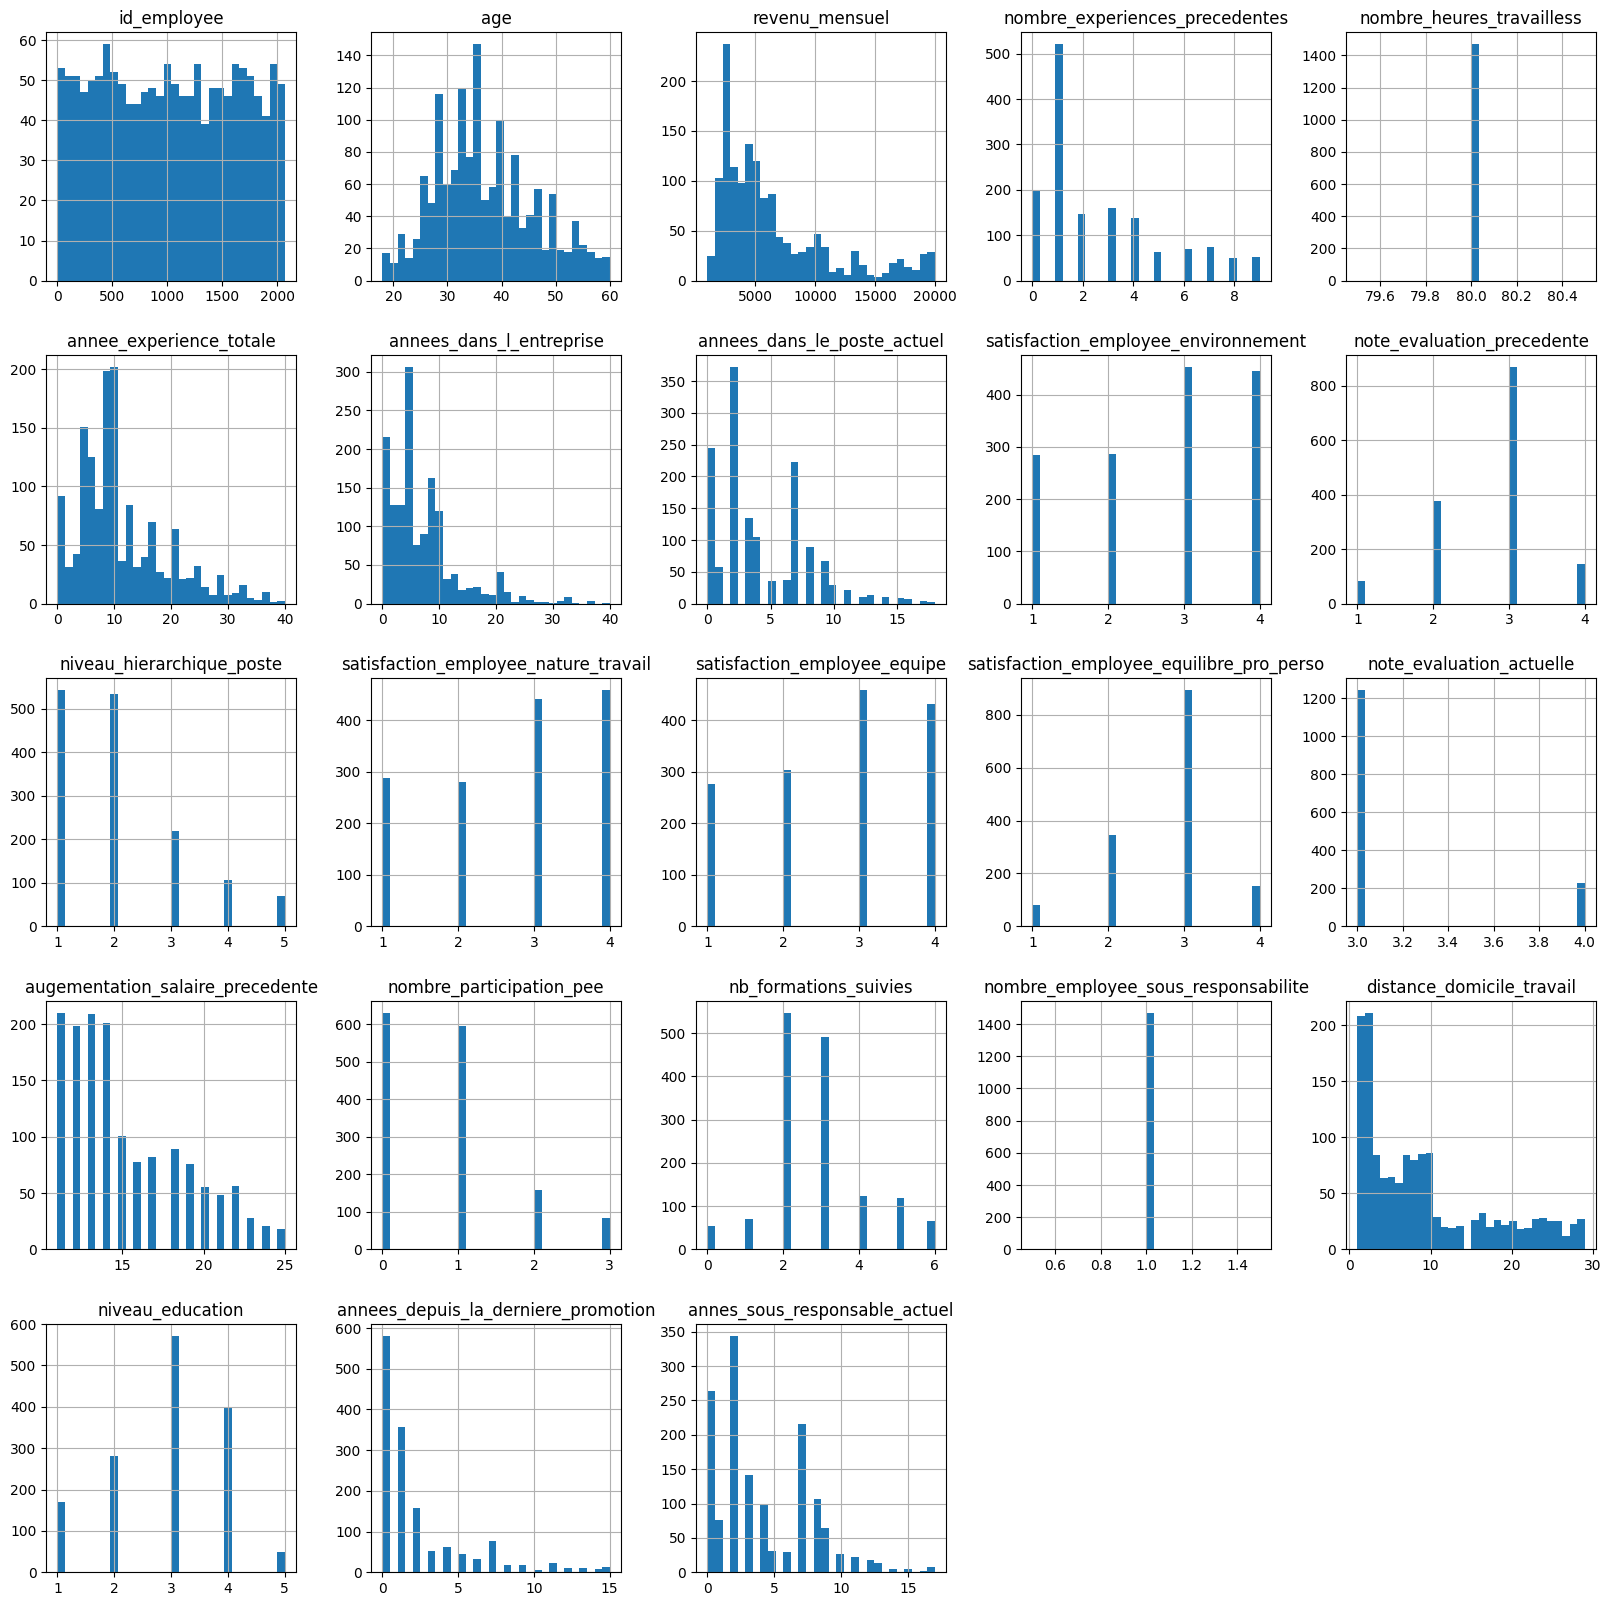

In [237]:
df_central.hist(bins = 30, figsize = (20,20))

### Résumé global des distributions

1. **Âge**

Répartition centrée autour de 25–45 ans.

Peu de très jeunes ou de très vieux employés → structure d’âge stable.

2. **Revenu mensuel**
’
Distribution fortement asymétrique (à droite).

La plupart gagnent moins de 5 000 €, avec quelques hauts salaires.
Présence probable de cadres ou managers dans la partie haute.

3. **Ancienneté et expérience**

`annees_dans_l_entreprise` et `annees_dans_le_poste_actuel`: beaucoup de valeurs faibles → beaucoup de nouveaux arrivants.

`annee_experience_totale` montre une majorité avec moins de 10 ans d’expérience.

4. **Notes d’évaluation & satisfaction**

Variables de satisfaction (`satisfaction_employee_*`) : souvent sur 4 points, avec des pics marqués → échelles d’évaluation internes.

Distribution relativement équilibrée, mais il y a des opinions divisées pour certains critères (ex. “satisfaction équipe” )
*À explorer*: satisfaction vs attrition.

5. **Augmentation de salaire précédente**

Majorité autour de 10–15 %, avec quelques hausses plus fortes.
Les augmentations sont rares et faibles pour la majorité — possible lien avec l’attrition.

6. **Distance domicile–travail**

Distribution concentrée sur les faibles distances, mais avec une queue longue jusqu’à 30 km.
Les longs trajets pourraient influencer le départ.

7. **Formations et participation**

`nb_formations_suivies` : la plupart ont suivi 0 à 3 formations.

`nombre_participation_pee` (plan épargne entreprise) : faible participation globale.
*Possible interprétation* Engagement ou opportunités de développement limitées 

8. **Années depuis la dernière promotion**

Beaucoup de zéros → beaucoup de salariés sans promotion récente.
Un facteur classique de départ 

9. **Niveau hiérarchique et éducation**

Niveaux hiérarchiques faibles dominants (1–2) → majorité de non-cadres.

Niveau d’éducation concentré entre 2 et 4 → diplômés du supérieur 

### Résumé global

Les employés sont majoritairement jeunes à mi-carrière (30–45 ans), avec une faible ancienneté dans l’entreprise et des revenus modestes.

La majorité a peu d’opportunités de promotion et un engagement modéré (formations, PEE).

Les distributions de satisfaction sont moyennes mais variables selon le critère, ce qui pourrait expliquer certains départs.

Les données montrent une population RH avec beaucoup de nouveaux talents, peu de fidélisation à long terme.


### Visualisation de données 

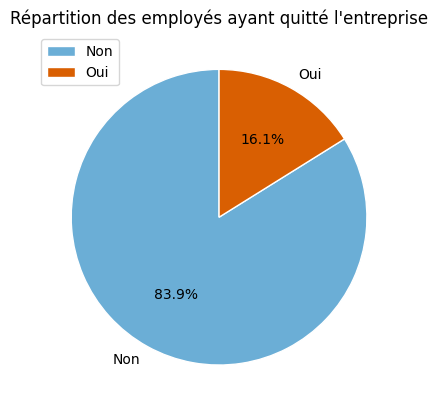

In [215]:
df_central['attrition'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,                        
    legend=True,
    wedgeprops={"edgecolor": "white"},
    colors=["#6BAED6", "#D95F02"],
)

plt.title("Répartition des employés ayant quitté l'entreprise")
plt.ylabel("")  
plt.show()

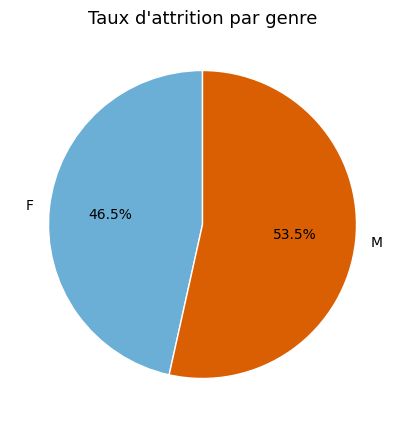

In [216]:
# Calcul du taux d’attrition par genre
attrition_rate_gender = (
    df_central.groupby("genre")["attrition"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Ne garder que les "Oui" (ceux qui ont quitté)
attrition_rate_gender = attrition_rate_gender[attrition_rate_gender["attrition"] == "Oui"]

# Plot
plt.figure(figsize=(5, 5))
plt.pie(
    attrition_rate_gender["proportion"],
    labels=attrition_rate_gender["genre"],
    autopct="%1.1f%%",
    colors=["#6BAED6", "#D95F02"],
    startangle=90,
    wedgeprops={"edgecolor": "white"},
)

plt.title("Taux d'attrition par genre", fontsize=13)
plt.show()


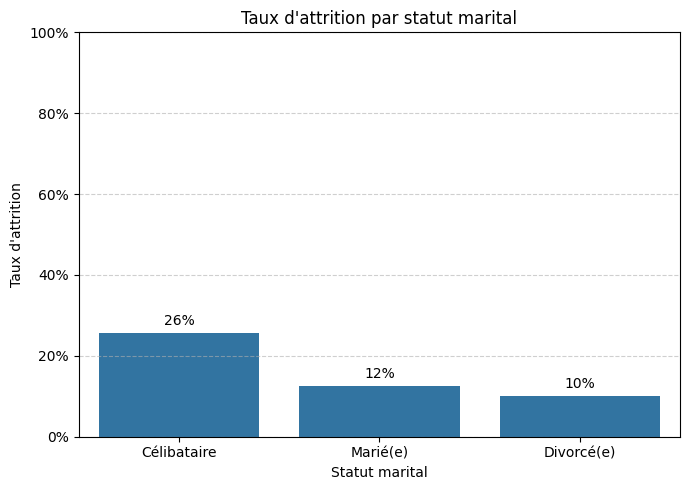

In [238]:
# Taux d'attrition par le statut marital
attrition_rate_statut = (
    df_central.groupby("statut_marital")["attrition"]
    .value_counts(normalize=True)
    .rename("taux")
    .reset_index()
)
# Ne garder que les "Oui" (ceux qui ont quitté)
attrition_rate_statut = attrition_rate_statut[attrition_rate_statut["attrition"] == "Oui"]

# Tri du plus haut au plus bas
attrition_rate_statut = attrition_rate_statut.sort_values("taux", ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(
    data=attrition_rate_statut,
    x="statut_marital",
    y="taux",
)
plt.title("Taux d'attrition par statut marital")
plt.xlabel("Statut marital")
plt.ylabel("Taux d'attrition")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}%"))

# Étiquettes de pourcentage
for i, v in enumerate(attrition_rate_statut["taux"].values):
    plt.text(i, v + 0.02, f"{v*100:.0f}%", ha="center")

plt.tight_layout()
plt.show()



In [217]:
# Taux d'attrition par âge
attrition_by_age = (
    df_central.groupby("age")["attrition"] 
    .value_counts(normalize=True)
    .rename("rate")
    .reset_index()
)
# Garder uniquement les employés qui ont quitté ("Oui")
attrition_by_age = attrition_by_age[attrition_by_age["attrition"] == "Oui"]

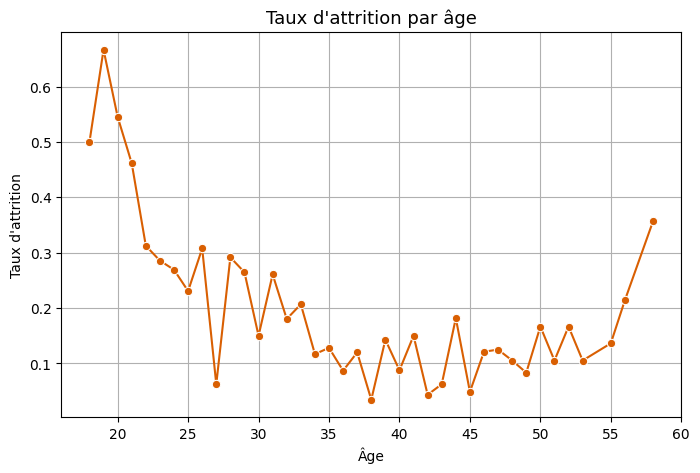

In [218]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=attrition_by_age, x="age", y="rate", color="#D95F02", marker="o")
plt.title("Taux d'attrition par âge", fontsize=13)
plt.xlabel("Âge")
plt.ylabel("Taux d'attrition")
plt.grid(True)
plt.show()

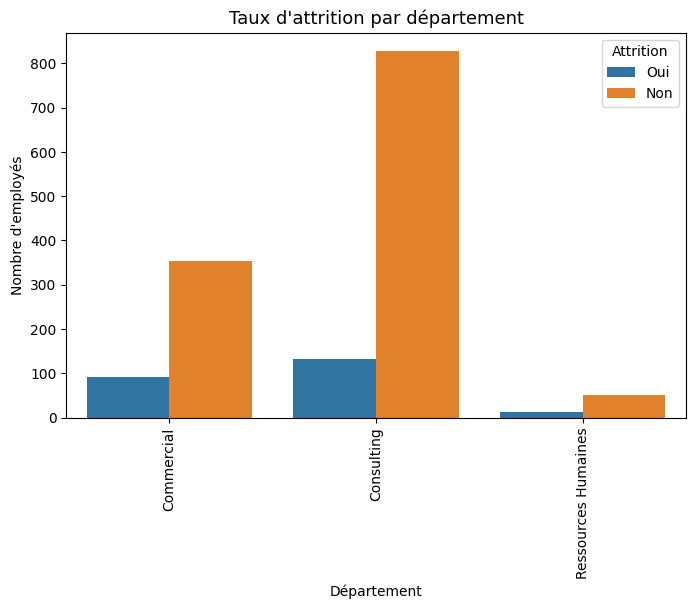

In [219]:
# Taux d’attrition par département
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_central,
    x="departement",
    hue="attrition",
)

plt.title("Taux d'attrition par département", fontsize=13)
plt.xlabel("Département")
plt.ylabel("Nombre d'employés")
plt.xticks(rotation=90)
plt.legend(title="Attrition", loc="upper right")
plt.show()

In [222]:
# Table des taux (proportion de "Oui" par niveau de satisfaction)
tab = (
    pd.crosstab(
        df_central["satisfaction_employee_nature_travail"],
        df_central["attrition"],
        normalize="index"
    )
    .rename(columns={"Oui": "taux_attrition"})
    .reset_index()
    .loc[:, ["satisfaction_employee_nature_travail", "taux_attrition"]]
    .sort_values("satisfaction_employee_nature_travail")
)


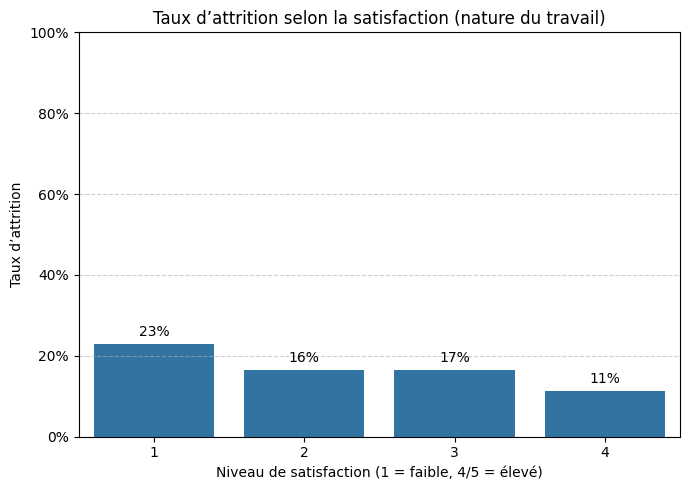

In [224]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=tab,
    x="satisfaction_employee_nature_travail",
    y="taux_attrition",
)
plt.title("Taux d’attrition selon la satisfaction (nature du travail)")
plt.xlabel("Niveau de satisfaction (1 = faible, 4/5 = élevé)")
plt.ylabel("Taux d’attrition")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}%"))

# étiquettes %
for i, v in enumerate(tab["taux_attrition"].values):
    plt.text(i, v + 0.02, f"{v*100:.0f}%", ha="center")

plt.tight_layout()
plt.show()

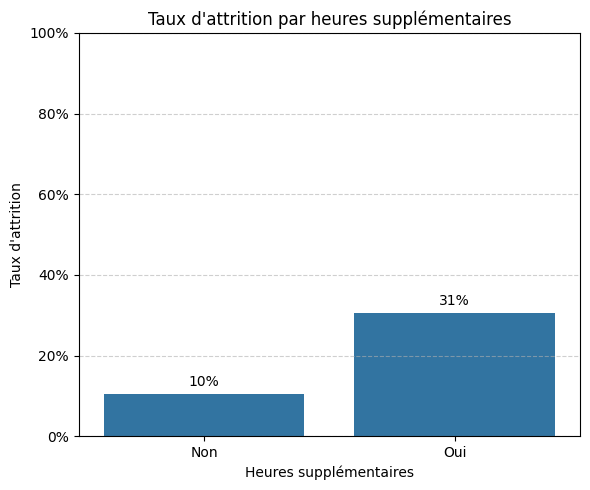

In [235]:
# Taux d'attrition par heures supplémentaires (proportion de "Oui" par groupe)
tab = (
    pd.crosstab(
        df_central["heure_supplementaires"],   
        df_central["attrition"],               
        normalize="index"
    )
    .rename(columns={"Oui": "taux_attrition"})
    .reset_index()
    .loc[:, ["heure_supplementaires", "taux_attrition"]]
    .sort_values("heure_supplementaires")
)

plt.figure(figsize=(6,5))
sns.barplot(
    data=tab,
    x="heure_supplementaires",
    y="taux_attrition",
)
plt.title("Taux d'attrition par heures supplémentaires")
plt.xlabel("Heures supplémentaires")
plt.ylabel("Taux d'attrition")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}%"))

# étiquettes %
for i, v in enumerate(tab["taux_attrition"].values):
    plt.text(i, v + 0.02, f"{v*100:.0f}%", ha="center")

plt.tight_layout()
plt.show()

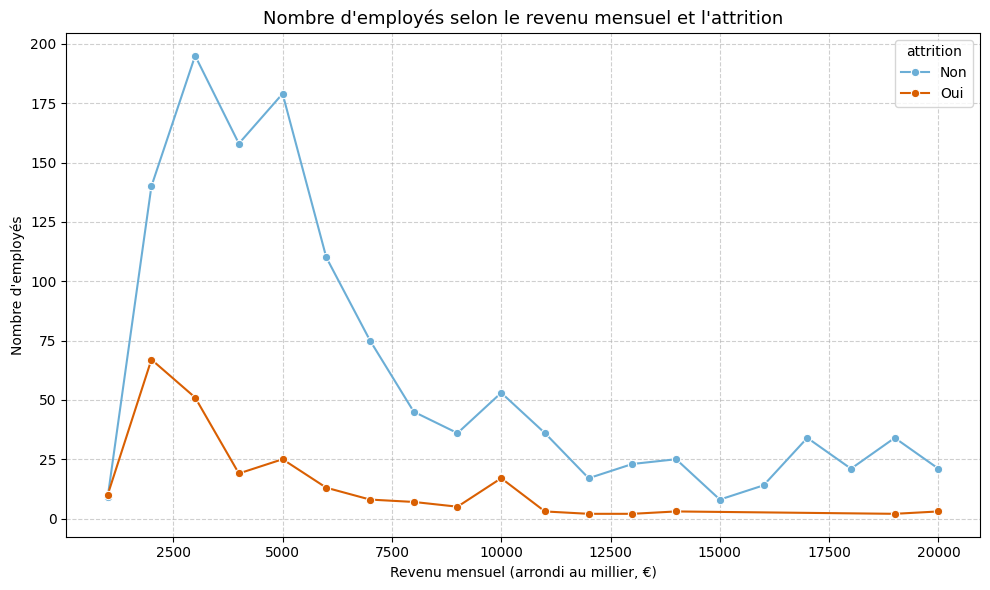

In [225]:
# Le taux d’attrition par niveau de salaire
# Regrouper par revenu mensuel et attrition, puis compter le nombre d'employés
rate_att = (
    df_central
      .groupby([df_central["revenu_mensuel"].round(-3).rename("revenu_mensuel"),
                "attrition"])
      .size()
      .reset_index(name="counts")
      .sort_values("revenu_mensuel")
)

# Lineplot à deux lignes (restés vs partis)
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=rate_att,
    x="revenu_mensuel",
    y="counts",
    hue="attrition",         # "Non" et "Oui"
    hue_order=["Non", "Oui"],            # ajuste si "No/Yes"
    palette=["#6BAED6", "#D95F02"],      # bleu = Non, terracotta = Oui
    marker="o"
)

plt.title("Nombre d'employés selon le revenu mensuel et l'attrition", fontsize=13)
plt.xlabel("Revenu mensuel (arrondi au millier, €)")
plt.ylabel("Nombre d'employés")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Le taux d'attrition est manifestement élevé pour les revenus faibles, inférieurs à 5 000 dollars par mois.

La courbe descend au fur et à mesure que le salaire augmente :

Cela signifie que plus le revenu est élevé, plus le risque de départ est faible

In [226]:
# Taux d’attrition par niveau d’augmentation
taux_aug = (
    pd.crosstab(df_central["augementation_salaire_precedente"],
                df_central["attrition"],
                normalize="index")
    .reset_index()
    .rename(columns={"Oui":"taux_attrition"})
    .sort_values("augementation_salaire_precedente")
)


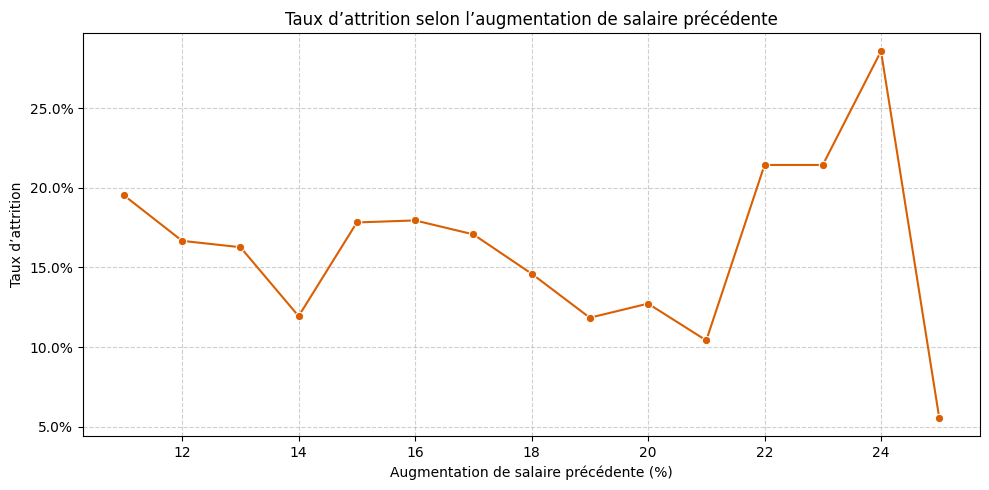

In [227]:
plt.figure(figsize=(10,5))
sns.lineplot(data=taux_aug, x="augementation_salaire_precedente", y="taux_attrition",
             marker="o", color="#D95F02")
plt.title("Taux d’attrition selon l’augmentation de salaire précédente")
plt.xlabel("Augmentation de salaire précédente (%)")
plt.ylabel("Taux d’attrition")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y,_: f"{y*100:.1f}%"))
plt.grid(True, ls="--", alpha=0.6)
plt.tight_layout(); plt.show()

### KDE = Kernel Density Estimation 

Utilisée pour visualiser la densité de probabilité d'une variable continue.  
La KDE décrit la densité de probabilité à différentes valeurs d'une variable continue. 

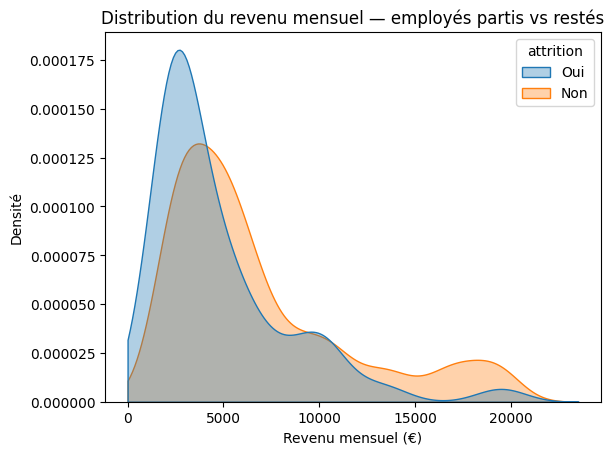

In [228]:
sns.kdeplot(
    data=df_central, x="revenu_mensuel",
    hue="attrition",      # Non / Oui
    common_norm=False, fill=True, alpha=0.35,
    bw_adjust=1.0, clip=(0, None)
)
plt.title("Distribution du revenu mensuel — employés partis vs restés")
plt.xlabel("Revenu mensuel (€)"); plt.ylabel("Densité")
plt.show()

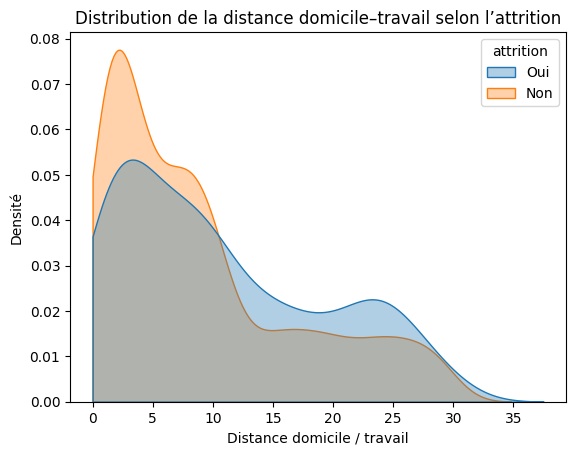

In [229]:

sns.kdeplot(
    data=df_central, x="distance_domicile_travail",
    hue="attrition",      # Non / Oui
    common_norm=False, fill=True, alpha=0.35,
    bw_adjust=1.0, clip=(0, None,)
)
plt.title("Distribution de la distance domicile–travail selon l’attrition")
plt.xlabel("Distance domicile / travail"); plt.ylabel("Densité")
plt.show()

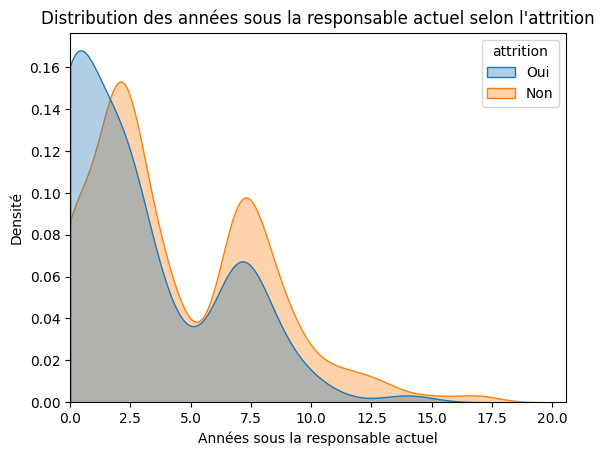

In [230]:

sns.kdeplot(
    data=df_central, x="annes_sous_responsable_actuel",
    hue="attrition",      # Non / Oui
    common_norm=False, fill=True, alpha=0.35,
    bw_adjust=1.0,  clip=(0, None,)
)
plt.title("Distribution des années sous la responsable actuel selon l'attrition")
plt.xlabel("Années sous la responsable actuel"); plt.ylabel("Densité")
plt.xlim(left=0) 
plt.show()

In [231]:
df_central.to_csv("df_central.csv", index=False)

# EDA Remarques final

- L'ensemble de données ne comporte **aucune valeur manquante ou erronée**, et toutes les caractéristiques sont du type de données correct.
  
- L'ensemble de données est **déséquilibré**, la majorité des observations décrivant des employés actuellement en poste.

- Les employés **célibataires** représentent la plus grande proportion de départs, par rapport à leurs homologues mariés et divorcés.

- Environ 10 % des **départs** ont eu lieu après **deux ans d'ancienneté** dans l'entreprise.

- Les personnes qui vivent **loin de leur lieu de travail** présentent une proportion plus élevée de départs que leurs homologues.

- Les personnes qui voyagent **fréquemment** présentent une proportion plus élevée de départs que leurs homologues.

- Les personnes qui doivent faire des **heures supplémentaires** présentent une proportion plus élevée de départs que leurs homologues.

- Les employés qui ont déjà travaillé dans plusieurs entreprises auparavant présentent une proportion plus élevée de départs que leurs homologues.
